<a href="https://colab.research.google.com/github/Mamadyc/Pr-diction-des-couts-d-assurance-maladies/blob/main/Pr%C3%A9diction_des_co%C3%BBt_assurance_maladie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PREDICTION DES FRAIS D'ASSURANCE MALADIE

In [ ]:
# Importation des librairies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

Importation des données

In [ ]:
import pandas as pd

In [ ]:
## importation $ exploration des données
mc= pd.read_csv("/content/medical_insurance.csv")
mc.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


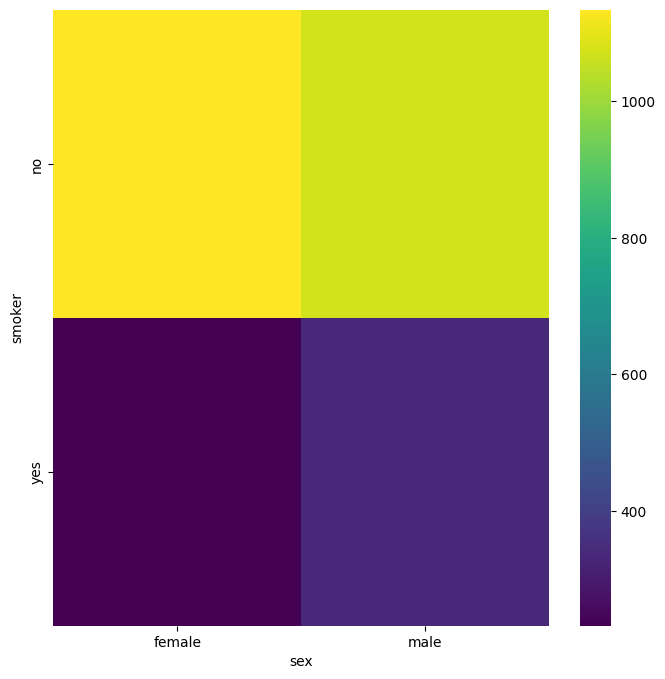

In [ ]:
# répresentation des fumeurs ou non en fonction du sex
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['smoker'].value_counts()
    for x_label, grp in mc.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('smoker')

In [ ]:
mc.describe()


,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
print(mc)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200

[2772 rows x 7 columns]


In [ ]:
#vérification des valeurs marquantes
missing_values = mc.apply(lambda x: x.isnull().sum())

# Afficher le nombre de valeurs manquantes dans chaque colonne
print("Nombre de valeurs manquantes dans chaque colonne :")
print(missing_values)

Nombre de valeurs manquantes dans chaque colonne :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
# créer des colonnes 'sex', 'smoker' et 'region' pour des variables catégorielle
mcd = pd.get_dummies(mc[['sex', 'smoker', 'region']])

# Joindre les colonnes dummies avec le DataFrame original
mdd = mc.join(mcd)

# Afficher le DataFrame résultant
print(mdd)


      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
2767   47  female  45.320         1     no  southeast   8569.86180   
2768   21  female  34.600         0     no  southwest   2020.17700   
2769   19    male  26.030         1    yes  northwest  16450.89470   
2770   23    male  18.715         0     no  northwest  21595.38229   
2771   54    male  31.600         0     no  southwest   9850.43200   

      sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0           True     False      False        True             False   
1          False 

In [ ]:
# Supprimer les colonnes 'sex', 'smoker' et 'region' du DataFrame mcd
mdd.drop(columns=['sex', 'smoker', 'region'], inplace=True)


In [ ]:
print(mdd)

      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400        True     False      False   
1      18  33.770         1   1725.55230       False      True       True   
2      28  33.000         3   4449.46200       False      True       True   
3      33  22.705         0  21984.47061       False      True       True   
4      32  28.880         0   3866.85520       False      True       True   
...   ...     ...       ...          ...         ...       ...        ...   
2767   47  45.320         1   8569.86180        True     False       True   
2768   21  34.600         0   2020.17700        True     False       True   
2769   19  26.030         1  16450.89470       False      True      False   
2770   23  18.715         0  21595.38229       False      True       True   
2771   54  31.600         0   9850.43200       False      True       True   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

In [ ]:
mdd.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
print(mdd)

      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400        True     False      False   
1      18  33.770         1   1725.55230       False      True       True   
2      28  33.000         3   4449.46200       False      True       True   
3      33  22.705         0  21984.47061       False      True       True   
4      32  28.880         0   3866.85520       False      True       True   
...   ...     ...       ...          ...         ...       ...        ...   
2767   47  45.320         1   8569.86180        True     False       True   
2768   21  34.600         0   2020.17700        True     False       True   
2769   19  26.030         1  16450.89470       False      True      False   
2770   23  18.715         0  21595.38229       False      True       True   
2771   54  31.600         0   9850.43200       False      True       True   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

# Les modèles

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# Division des données
X = mdd.drop(columns=["charges"])
y = mdd["charges"]

# Division des  données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# les modèles
models = {
    "Régression linéaire": LinearRegression(),
    "SVM": SVR(),
    "Arbre de décision": DecisionTreeRegressor()
}

# Entraîner et évaluer chaque modèle
for name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train)

    # prédictions sur l'ensemble de test
    predictions = model.predict(X_test)

    # Calcul l'erreur quadratique moyenne (MSE)
    mse = mean_squared_error(y_test, predictions)

    # Afficher les performances du modèle
    print(f"Modèle: {name}")
    print(f"MSE: {mse}")
    print("-----------------------------------------")


Modèle: Régression linéaire
MSE: 39933194.54805147
-----------------------------------------
Modèle: SVM
MSE: 164384281.0275509
-----------------------------------------
Modèle: Arbre de décision
MSE: 8011914.789646994
-----------------------------------------


In [ ]:
import matplotlib.pyplot as plt

# pour visualiser les prédictions par rapport aux valeurs réelles
plt.figure(figsize=(10, 6))
for name, predictions in model_predictions.items():
    plt.scatter(y_test, predictions, label=name, alpha=0.7)

plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Comparaison des prédictions des modèles")
plt.legend()
plt.show()


NameError: name 'model_predictions' is not defined

<Figure size 1000x600 with 0 Axes>